# Calculating CpG ratio for the *Acropora millepora* transcriptome

This workflow calculates CpG ratio, or CpG O/E, for contigs in the *Acropora millepora* [transcriptome](http://www.ncbi.nlm.nih.gov/nuccore?term=74409%5BBioProject%5D). CpG ratio is an estimate of germline DNA methylation.

This workflow is an extension of another IPython notebook workflow, `Amil_blast_anno.ipynb`, that generates an annotation of the same transcriptome. This workflow assumes that you have created the directories and files specified in the annotation workflow.

In [1]:
cd /Users/jd/Documents/Projects/Coral-CpG-ratio-MS/data/Amil

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/data/Amil


In [2]:
#fasta file
!head -2 Amil_Moya.fasta
!echo 
!echo number of seqs =
!fgrep -c ">" Amil_Moya.fasta

>gi|379072745|gb|JR970414.1| TSA: Acropora millepora Cluster034439.Acmimixed mRNA sequence
TCATCATTATTTCTTTTTGTTTTTCTGTGATCTTCGGTCAATGCGATAGATCCTCGAGTTATCGTGACTG

number of seqs =
52963


In [4]:
#Converting FASTA to tabular format and placing output file in analyses directory
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
Amil_Moya.fasta > /Users/jd/Documents/Projects/Coral-CpG-ratio-MS/analyses/Amil/fasta2tab


Converted 52963 FASTA records in 1149658 lines to tabular format
Total sequence length: 71250280



In [2]:
cd /Users/jd/Documents/Projects/Coral-CpG-ratio-MS/analyses/Amil

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/analyses/Amil


In [6]:
#Checking header on new tabular format file
!head -2 fasta2tab
!tail -2 fasta2tab

gi|379072745|gb|JR970414.1|	TSA: Acropora millepora Cluster034439.Acmimixed mRNA sequence	TCATCATTATTTCTTTTTGTTTTTCTGTGATCTTCGGTCAATGCGATAGATCCTCGAGTTATCGTGACTGCGCTCCAGACCAAGTCTGTTGTAGGAGGCAGTGTTTTTACAGCTCGAACTGTTTATATCTGTCTTGCTCCATGGACTCCGATTGTTCAGTGAATGAAGTCTGTTGTAGCAGCAAGTGTCGTTCTGGTNNNNNNNNNNCTGACTGCAGTGGGGATTTTTGTCGCTCGAACAATGATTGCAGCGTTGGGCAAAAGTGTTGTGTGAATACCTGCACCAACTATGATTGTGAGGACCCTACCGTCGCCATTCTTATCGCGGTAGTGGGTTCGCTCGTGGGCTTATTTGTTGTTTTCATTTCAATTTACTACTGCCACAGAAGAGCTCGTTTGGGTCGTTCCGGTACAGCAGAGGTGGGAAGACAAGTTGCCCCAACCGATGCTATCACAACCCAATCAGCAAACCAACAAGGCTACGCATATCAGCAACTCCCTTAAATATCATCAGTATCAGACACCCATTTACAATCCGGAGACACAGAGACAACCAGGAGGAATACTTACTTCACATCGTGCATATGGTGAACTTCAAACCACTTGATCCCCATGTCCAGCGGAAGACT
gi|379072746|gb|JR970415.1|	TSA: Acropora millepora Cluster034438.Acmimixed mRNA sequence	CGCCCCCACGTCGTCATCTGACGTTCCTGTCCTGTTGCTAAATCAGCCTATTGATTGCGGGAACACATCAATCAACTACTAAACAACAGAATCCTGGGTTTTCAGACTTACAGTGTCTCTGCGATGAGGAGAATGTTCCCCTGTCACCACAAGCACTCCTGTCTGGGCACTAAGACAAATCAGCAATGAGA

In [7]:
#Removing pipes
!tr '|' "\t" <fasta2tab> fasta2tab2
!head -2 fasta2tab2

gi	379072745	gb	JR970414.1		TSA: Acropora millepora Cluster034439.Acmimixed mRNA sequence	TCATCATTATTTCTTTTTGTTTTTCTGTGATCTTCGGTCAATGCGATAGATCCTCGAGTTATCGTGACTGCGCTCCAGACCAAGTCTGTTGTAGGAGGCAGTGTTTTTACAGCTCGAACTGTTTATATCTGTCTTGCTCCATGGACTCCGATTGTTCAGTGAATGAAGTCTGTTGTAGCAGCAAGTGTCGTTCTGGTNNNNNNNNNNCTGACTGCAGTGGGGATTTTTGTCGCTCGAACAATGATTGCAGCGTTGGGCAAAAGTGTTGTGTGAATACCTGCACCAACTATGATTGTGAGGACCCTACCGTCGCCATTCTTATCGCGGTAGTGGGTTCGCTCGTGGGCTTATTTGTTGTTTTCATTTCAATTTACTACTGCCACAGAAGAGCTCGTTTGGGTCGTTCCGGTACAGCAGAGGTGGGAAGACAAGTTGCCCCAACCGATGCTATCACAACCCAATCAGCAAACCAACAAGGCTACGCATATCAGCAACTCCCTTAAATATCATCAGTATCAGACACCCATTTACAATCCGGAGACACAGAGACAACCAGGAGGAATACTTACTTCACATCGTGCATATGGTGAACTTCAAACCACTTGATCCCCATGTCCAGCGGAAGACT
gi	379072746	gb	JR970415.1		TSA: Acropora millepora Cluster034438.Acmimixed mRNA sequence	CGCCCCCACGTCGTCATCTGACGTTCCTGTCCTGTTGCTAAATCAGCCTATTGATTGCGGGAACACATCAATCAACTACTAAACAACAGAATCCTGGGTTTTCAGACTTACAGTGTCTCTGCGATGAGGAGAATGTTCCCCTGTCACCACAAGCACTCCTGTCTGGGCACTAAGACAAATCAGCAATGAGA

In [8]:
#Add column with length of sequence
!perl -e '$col = 6;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
fasta2tab2 > tab_1


Added column with length of column 6 for 52963 lines.



In [9]:
!head -1 tab_1
!wc tab_1

gi	379072745	gb	JR970414.1		TSA: Acropora millepora Cluster034439.Acmimixed mRNA sequence	TCATCATTATTTCTTTTTGTTTTTCTGTGATCTTCGGTCAATGCGATAGATCCTCGAGTTATCGTGACTGCGCTCCAGACCAAGTCTGTTGTAGGAGGCAGTGTTTTTACAGCTCGAACTGTTTATATCTGTCTTGCTCCATGGACTCCGATTGTTCAGTGAATGAAGTCTGTTGTAGCAGCAAGTGTCGTTCTGGTNNNNNNNNNNCTGACTGCAGTGGGGATTTTTGTCGCTCGAACAATGATTGCAGCGTTGGGCAAAAGTGTTGTGTGAATACCTGCACCAACTATGATTGTGAGGACCCTACCGTCGCCATTCTTATCGCGGTAGTGGGTTCGCTCGTGGGCTTATTTGTTGTTTTCATTTCAATTTACTACTGCCACAGAAGAGCTCGTTTGGGTCGTTCCGGTACAGCAGAGGTGGGAAGACAAGTTGCCCCAACCGATGCTATCACAACCCAATCAGCAAACCAACAAGGCTACGCATATCAGCAACTCCCTTAAATATCATCAGTATCAGACACCCATTTACAATCCGGAGACACAGAGACAACCAGGAGGAATACTTACTTCACATCGTGCATATGGTGAACTTCAAACCACTTGATCCCCATGTCCAGCGGAAGACT	628
   52963  635556 76310959 tab_1


In [10]:
#Just printing contig ID in column 2
!awk '{print $2, "\t", $11, "\t", $12}' tab_1 > tab_2
!head -1 tab_2

379072745 	 TCATCATTATTTCTTTTTGTTTTTCTGTGATCTTCGGTCAATGCGATAGATCCTCGAGTTATCGTGACTGCGCTCCAGACCAAGTCTGTTGTAGGAGGCAGTGTTTTTACAGCTCGAACTGTTTATATCTGTCTTGCTCCATGGACTCCGATTGTTCAGTGAATGAAGTCTGTTGTAGCAGCAAGTGTCGTTCTGGTNNNNNNNNNNCTGACTGCAGTGGGGATTTTTGTCGCTCGAACAATGATTGCAGCGTTGGGCAAAAGTGTTGTGTGAATACCTGCACCAACTATGATTGTGAGGACCCTACCGTCGCCATTCTTATCGCGGTAGTGGGTTCGCTCGTGGGCTTATTTGTTGTTTTCATTTCAATTTACTACTGCCACAGAAGAGCTCGTTTGGGTCGTTCCGGTACAGCAGAGGTGGGAAGACAAGTTGCCCCAACCGATGCTATCACAACCCAATCAGCAAACCAACAAGGCTACGCATATCAGCAACTCCCTTAAATATCATCAGTATCAGACACCCATTTACAATCCGGAGACACAGAGACAACCAGGAGGAATACTTACTTCACATCGTGCATATGGTGAACTTCAAACCACTTGATCCCCATGTCCAGCGGAAGACT 	 628


In [11]:
#Instead of using the step to deal with description name issues above, the file used to count Cs and Gs will only include the sequence
!awk '{print $2}' tab_2 > tab_3

In [12]:
#This counts CGs - both cases
!echo "CG" | awk -F\[Cc][Gg] '{print NF-1}' tab_3 > CG 

In [13]:
#Counts Cs
!echo "C" | awk -F\[Cc] '{print NF-1}' tab_3 > C 

In [14]:
#Counts Gs
!echo "G" | awk -F\[Gg] '{print NF-1}' tab_3 > G 

In [15]:
#Combining counts
!paste tab_2 \
CG \
C \
G \
> comb
!head -5 comb

379072745 	 TCATCATTATTTCTTTTTGTTTTTCTGTGATCTTCGGTCAATGCGATAGATCCTCGAGTTATCGTGACTGCGCTCCAGACCAAGTCTGTTGTAGGAGGCAGTGTTTTTACAGCTCGAACTGTTTATATCTGTCTTGCTCCATGGACTCCGATTGTTCAGTGAATGAAGTCTGTTGTAGCAGCAAGTGTCGTTCTGGTNNNNNNNNNNCTGACTGCAGTGGGGATTTTTGTCGCTCGAACAATGATTGCAGCGTTGGGCAAAAGTGTTGTGTGAATACCTGCACCAACTATGATTGTGAGGACCCTACCGTCGCCATTCTTATCGCGGTAGTGGGTTCGCTCGTGGGCTTATTTGTTGTTTTCATTTCAATTTACTACTGCCACAGAAGAGCTCGTTTGGGTCGTTCCGGTACAGCAGAGGTGGGAAGACAAGTTGCCCCAACCGATGCTATCACAACCCAATCAGCAAACCAACAAGGCTACGCATATCAGCAACTCCCTTAAATATCATCAGTATCAGACACCCATTTACAATCCGGAGACACAGAGACAACCAGGAGGAATACTTACTTCACATCGTGCATATGGTGAACTTCAAACCACTTGATCCCCATGTCCAGCGGAAGACT 	 628	25	145	140
379072746 	 CGCCCCCACGTCGTCATCTGACGTTCCTGTCCTGTTGCTAAATCAGCCTATTGATTGCGGGAACACATCAATCAACTACTAAACAACAGAATCCTGGGTTTTCAGACTTACAGTGTCTCTGCGATGAGGAGAATGTTCCCCTGTCACCACAAGCACTCCTGTCTGGGCACTAAGACAAATCAGCAATGAGACATTCTTGGCTTCCAAATCAATAAGTGCACATTAACTGGTGTTTGGAGAGACCAATCACCTATCTAGATATGGTCCACCATATTGCAGATTGAAACAATGAATAATAGAACACAAACAATACCCTAACTTGACCACAAT

# Calculating CpGo/e based on [Gavery and Roberts (2010)](http://www.biomedcentral.com/1471-2164/11/483)

<img src="http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png" alt="BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png"/>

In [16]:
!awk '{print $1, "\t", (($4)/($5*$6))*(($3^2)/($3-1))}' comb > ID_CpG #use ^ instead of ** for exponent


In [17]:
!head ID_CpG

379072745 	 0.774633
379072746 	 0.283791
379072747 	 0.558113
379072748 	 0.662023
379072749 	 0.738617
379072750 	 0.318018
379072751 	 1.25641
379072752 	 0.328632
379072753 	 1.11106
379072754 	 0.801276


# Now joining CpG to annotation, but first must sort files.

In [3]:
#Sorting Amil Uniprot/Swissprot annotation file. This file was the result of work done in another notebook: 
#Amil_blast_anno.ipynb
!sort Amil_blastx_uniprot_sql.tab | tail -n +2 > Amil_blastx_uniprot_sql.tab.sorted
!head Amil_blastx_uniprot_sql.tab.sorted

gi	379072753	gb	JR970422.1		sp	O17185	SUP9_CAEEL	35.41	209	106	4	3	617	25	208	8e-28	  112
gi	379072756	gb	JR970425.1		sp	Q6DIF4	WDR1_XENTR	52.39	607	281	7	2609	804	1	604	0.0	  644
gi	379072758	gb	JR970427.1		sp	A6H584	CO6A5_MOUSE	24.88	406	279	12	106	1302	639	1025	6e-26	  117
gi	379072759	gb	JR970428.1		sp	Q17R07	ARFG3_BOVIN	43.16	95	49	2	2396	2124	422	515	4e-07	57.4
gi	379072761	gb	JR970430.1		sp	Q7ZYA5	PRKAA_XENLA	27.82	284	149	8	2334	1486	76	304	2e-14	79.0
gi	379072762	gb	JR970431.1		sp	Q68ED3	PAPD5_MOUSE	55.14	350	143	5	313	1359	116	452	2e-122	  390
gi	379072763	gb	JR970432.1		sp	O60678	ANM3_HUMAN	49.48	485	223	3	79	1506	48	519	9e-151	  460
gi	379072764	gb	JR970433.1		sp	Q8CI04	COG3_MOUSE	48.46	227	113	2	865	191	583	807	1e-57	  203
gi	379072772	gb	JR970441.1		sp	P15848	ARSB_HUMAN	37.79	217	92	6	2	547	324	532	1e-31	  124
gi	379072775	gb	JR970444.1		sp	Q5EBD9	ELP2_XENTR	33.74	243	142	6	1064	354	189	418	4e-27	  117


In [5]:
#Sorting GOSlim annotation file. This file was the result of work done in another notebook: Amil_blast_anno.ipynb
!sort Amil_GOSlim.tab | tail -n +2 > Amil_GOSlim.sorted
!head Amil_GOSlim.sorted

In [6]:
#Sorting CpG file
!sort ID_CpG > ID_CpG.sorted
!head ID_CpG.sorted

379072745 	 0.774633
379072746 	 0.283791
379072747 	 0.558113
379072748 	 0.662023
379072749 	 0.738617
379072750 	 0.318018
379072751 	 1.25641
379072752 	 0.328632
379072753 	 1.11106
379072754 	 0.801276


In [6]:
!join -1 1 -2 2 ID_CpG.sorted Amil_blastx_uniprot_sql.tab.sorted | awk '{print $1, "\t", $2}' > Amil_cpg_anno

In [7]:
!head Amil_cpg_anno

379072753 	 1.11106
379072756 	 0.552288
379072758 	 0.764334
379072759 	 0.50257
379072761 	 0.76335
379072762 	 0.442442
379072763 	 0.592282
379072764 	 0.773241
379072772 	 0.689241
379072775 	 0.53775


In [8]:
!join ID_CpG.sorted Amil_GOSlim.sorted > Amil_cpg_GOslim

In [9]:
!head Amil_cpg_GOslim

In [10]:
#Putting tabs in between columns
!awk '{print $1, "\t", $2, "\t", $3, $4, $5, $6}' Amil_cpg_GOslim > Amil_cpg_GOslim.tab
!head Amil_cpg_GOslim.tab

# Now time to plot data using pandas and matplot

In [11]:
import pandas as pd

In [13]:
jData = pd.read_table('Amil_cpg_GOslim.tab', header=None)
jData

,0,1,2
0,379072753,1.111060,other biological processes
1,,NaN,NaN
2,379072753,1.111060,transport
3,,NaN,NaN
4,379072756,0.552288,cell organization and biogenesis
5,379072758,0.764334,cell adhesion
6,,NaN,NaN
7,379072759,0.502570,other biological processes
8,,NaN,NaN
9,379072759,0.502570,signal transduction


In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt 

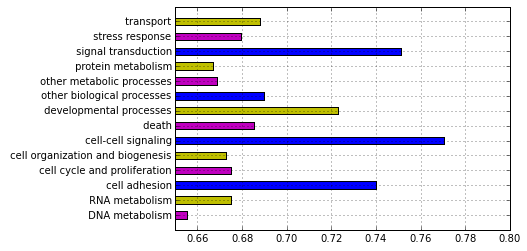

In [16]:
jData.groupby(2)[1].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.65, 0.8, -1, 14])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [17]:
#To plot density curve, must use CpG data with original annotation
CpG = pd.read_table('Amil_cpg_anno', header=None)
CpG

,0,1
0,379072753,1.111060
1,379072756,0.552288
2,379072758,0.764334
3,379072759,0.502570
4,379072761,0.763350
5,379072762,0.442442
6,379072763,0.592282
7,379072764,0.773241
8,379072772,0.689241
9,379072775,0.537750


[-0.3, 1.7, 0, 1.7]

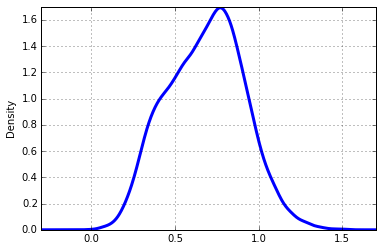

In [18]:
# pandas density plot
CpG[1].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 1.7])

## Now looking only at differentially expressed OA contigs, joining via common contig IDs

The file Moya_OA_genes.csv is a list of differentially expressed contigs in response to ocean acidification derived from a [supplementary data file](http://onlinelibrary.wiley.com/store/10.1111/j.1365-294X.2012.05554.x/asset/supinfo/MEC_5554_sm_FigS1-S3_TableS1-S9.pdf?v=1&s=8986ebf969c7552ad857973fff80a0752f87a129) featured in [Moya et al. (2012)](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-294X.2012.05554.x/full). The contig IDs are the same as in the transcriptome and can be joined using common contig IDs.

In [59]:
!head Moya_OA_genes.csv
!wc Moya_OA_genes.csv

Cluster000096
Cluster000102
Cluster004352
Cluster003365p
Cluster020895
Cluster021686
Cluster000208
Cluster001749
Cluster020627
Cluster011145
     234     234    3352 Moya_OA_genes.csv


In [66]:
!tr ',' "\t" <Moya_OA_genes.csv> Moya_OA_genes.tab
!head Moya_OA_genes.tab

Cluster000096
Cluster000102
Cluster004352
Cluster003365p
Cluster020895
Cluster021686
Cluster000208
Cluster001749
Cluster020627
Cluster011145


In [58]:
#In Excel, a .csv file was created that contains the 'Cluster" ID and the other contig ID field we originally used. 
!head contigIDs.csv
!wc contigIDs.csv

379072745,Cluster034439
379072746,Cluster034438
379072747,Cluster007054
379072748,Cluster034431
379072749,Cluster034430
379072750,Cluster034433
379072751,Cluster034432
379072752,Cluster034435
379072753,Cluster034434
379072754,Cluster034437
   52962   52963 1273552 contigIDs.csv


In [67]:
!tr ',' "\t" <contigIDs.csv> contigIDs.tab
!head contigIDs.tab

379072745	Cluster034439
379072746	Cluster034438
379072747	Cluster007054
379072748	Cluster034431
379072749	Cluster034430
379072750	Cluster034433
379072751	Cluster034432
379072752	Cluster034435
379072753	Cluster034434
379072754	Cluster034437


In [68]:
!sort Moya_OA_genes.tab > Moya_OA_genes_sorted.tab
!head Moya_OA_genes_sorted.tab

Cluster000024
Cluster000096
Cluster000102
Cluster000158m	
Cluster000158p
Cluster000208
Cluster000208	
Cluster000406
Cluster000424
Cluster000480


In [69]:
!sort -k2 contigIDs.tab > contigIDs_sorted.tab # sort on column 2
!head contigIDs_sorted.tab

379096802	Cluster000001
379096801	Cluster000002
379096800	Cluster000003
379096806	Cluster000004
379096805	Cluster000006
379096804	Cluster000007
379096798	Cluster000008
379096797	Cluster000009
379099915	Cluster000010m
379099906	Cluster000010p


In [74]:
!join -1 1 -2 2 Moya_OA_genes_sorted.tab contigIDs_sorted.tab | uniq > Moya_OA_contigIDs
!head Moya_OA_contigIDs
!wc Moya_OA_contigIDs

Cluster000024 379083315
Cluster000096 379079375
Cluster000102 379103380
Cluster000158m 379120937
Cluster000158p 379120890
Cluster000208 379094770
Cluster000406 379115338
Cluster000424 379101461
Cluster000480 379102107
Cluster000511 379098057
     217     434    5221 Moya_OA_contigIDs


## Now joining with CpG file

In [76]:
!sort -k2 Moya_OA_contigIDs > Moya_OA_contigIDs.sorted
!head Moya_OA_contigIDs.sorted

Cluster002816 379072903
Cluster031840 379072913
Cluster016915 379073364
Cluster023488 379073410
Cluster032164 379073609
Cluster007778 379074809
Cluster001907 379075128
Cluster005744 379075418
Cluster019721 379075495
Cluster021686 379075855


In [82]:
!join -1 2 -2 1 Moya_OA_contigIDs.sorted ID_CpG.sorted | awk '{ print $1, "\t", $3 }' > Moya_OA_CpG
!head Moya_OA_CpG

379072903 	 0.522193
379072913 	 0.568663
379073364 	 0.847868
379073410 	 0.449012
379073609 	 0.348797
379074809 	 0.882294
379075128 	 0.473422
379075418 	 0.781873
379075495 	 1.19552
379075855 	 1.02899


In [96]:
!join Moya_OA_CpG Amil_GOSlim.sorted | awk '{print $1, "\t", $2, "\t", $3, $4, $5, $6}' > Moya_OA_CpG_GOSlim
!head Moya_OA_CpG_GOSlim

## Now plotting data using pandas and matplot

In [97]:
Moya_OA_CpG_GOSlim_Data = pd.read_table('Moya_OA_CpG_GOSlim', header=None)
Moya_OA_CpG_GOSlim_Data

,0,1,2
0,379072903,0.522193,transport
1,,NaN,NaN
2,379072913,0.568663,cell organization and biogenesis
3,379073364,0.847868,cell organization and biogenesis
4,379073364,0.847868,other metabolic processes
5,,NaN,NaN
6,379073364,0.847868,stress response
7,,NaN,NaN
8,379073410,0.449012,cell cycle and proliferation
9,379073410,0.449012,other biological processes


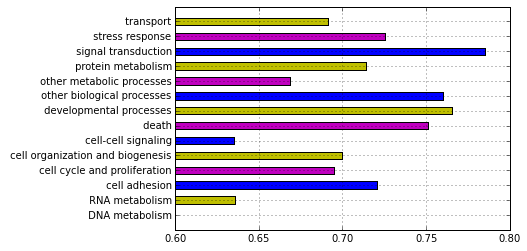

In [118]:
Moya_OA_CpG_GOSlim_Data.groupby(2)[1].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.6, 0.8, -1, 14])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [102]:
Moya_OA_CpG_Data = pd.read_table('Moya_OA_CpG', header=None)
Moya_OA_CpG_Data

,0,1
0,379072903,0.522193
1,379072913,0.568663
2,379073364,0.847868
3,379073410,0.449012
4,379073609,0.348797
5,379074809,0.882294
6,379075128,0.473422
7,379075418,0.781873
8,379075495,1.195520
9,379075855,1.028990


[-0.3, 1.7, 0, 2.0]

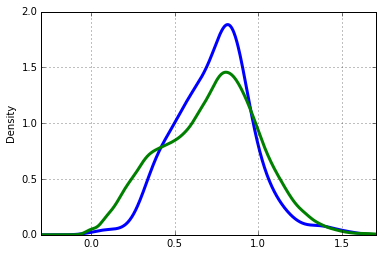

In [119]:
# pandas density plot
Moya_OA_CpG_Data[1].plot(kind='kde', linewidth=3);
CpG[1].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 2.0])

In [20]:
import numpy as np

In [21]:
np.mean(CpG)

0    3.790984e+08
1    6.824230e-01
dtype: float64

In [124]:
np.mean(Moya_OA_CpG_Data)

0    3.790982e+08
1    7.347987e-01
dtype: float64